<a href="https://colab.research.google.com/github/auliaarmyra/UAS-Deep-Learning_Kelompok-5/blob/main/preprocessingDatasetNASA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# === Data Preprocessing Kebakaran Hutan dari Citra Satelit ===
# Fitur: NDVI, NBR, Normalisasi Thermal
# Dataset: CSV dari MODIS/NASA (contoh: DatasetNASA_kebakaran_hutan.csv)

# 1. Import library
import pandas as pd
import numpy as np

from IPython.display import display

In [1]:
# 2. Upload file CSV
from google.colab import files
uploaded = files.upload()

Saving DatasetNASA_kebakaran_hutan.csv to DatasetNASA_kebakaran_hutan.csv


In [5]:
# 3. Baca CSV
df = pd.read_csv("DatasetNASA_kebakaran_hutan.csv")

In [19]:
# 4. Cek data awal
print("Data awal:")
display(df.head())

Data awal:


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,frp,daynight,type,RED,NIR,SWIR,NDVI,NBR,Thermal_norm,label
0,1.4905,127.6398,310.8,1.1,1.0,2024-08-15,119,Terra,MODIS,62,...,7.4,D,1,310.8,74.0,16.3,-0.615385,0.638981,0.484346,1
1,0.7899,127.3815,316.8,1.0,1.0,2024-08-15,119,Terra,MODIS,0,...,8.8,D,2,316.8,88.0,16.9,-0.565217,0.677788,0.583794,1
2,1.4919,127.6305,317.3,1.1,1.0,2024-08-15,119,Terra,MODIS,73,...,13.2,D,1,317.3,132.0,21.5,-0.412419,0.719870,0.508287,1
3,-2.5766,121.3840,354.2,1.5,1.2,2024-08-15,120,Terra,MODIS,97,...,117.4,D,2,354.2,1174.0,57.1,0.536448,0.907237,0.532228,0
4,-2.5812,121.3767,329.7,1.5,1.2,2024-08-15,120,Terra,MODIS,84,...,41.8,D,2,329.7,418.0,34.0,0.118095,0.849558,0.506446,1


In [7]:
# 5. Simulasi data band dari kolom CSV
#    (Karena file MODIS biasanya tidak langsung punya RED/NIR/SWIR dalam bentuk asli)
df['RED'] = df['brightness']                      # simulasi RED dari brightness
df['NIR'] = df['frp'] * 10                        # simulasi NIR dari FRP
df['SWIR'] = df['brightness'] - df['bright_t31']  # simulasi SWIR

In [8]:
# 6. Hitung NDVI
df['NDVI'] = (df['NIR'] - df['RED']) / (df['NIR'] + df['RED'])


In [9]:
# 7. Hitung NBR (Normalized Burn Ratio)
df['NBR'] = (df['NIR'] - df['SWIR']) / (df['NIR'] + df['SWIR'])

In [10]:
# 8. Normalisasi Thermal Band (bright_t31)
df['Thermal_norm'] = (df['bright_t31'] - df['bright_t31'].min()) / (df['bright_t31'].max() - df['bright_t31'].min())

In [11]:
# 9. Buat label (simulasi)
#Label 1 = Kebakaran jika Thermal tinggi ATAU NDVI rendah
df['label'] = np.where((df['Thermal_norm'] > 0.8) | (df['NDVI'] < 0.3), 1, 0)

In [12]:
# 10. Simpan dataset hasil preprocessing
df.to_csv("DatasetNASA_kebakaran_preprocessed.csv", index=False)

In [13]:
# 11. Download hasil
files.download("DatasetNASA_kebakaran_preprocessed.csv")

print("\nPreprocessing selesai! Dataset siap untuk model.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Preprocessing selesai! Dataset siap untuk model.


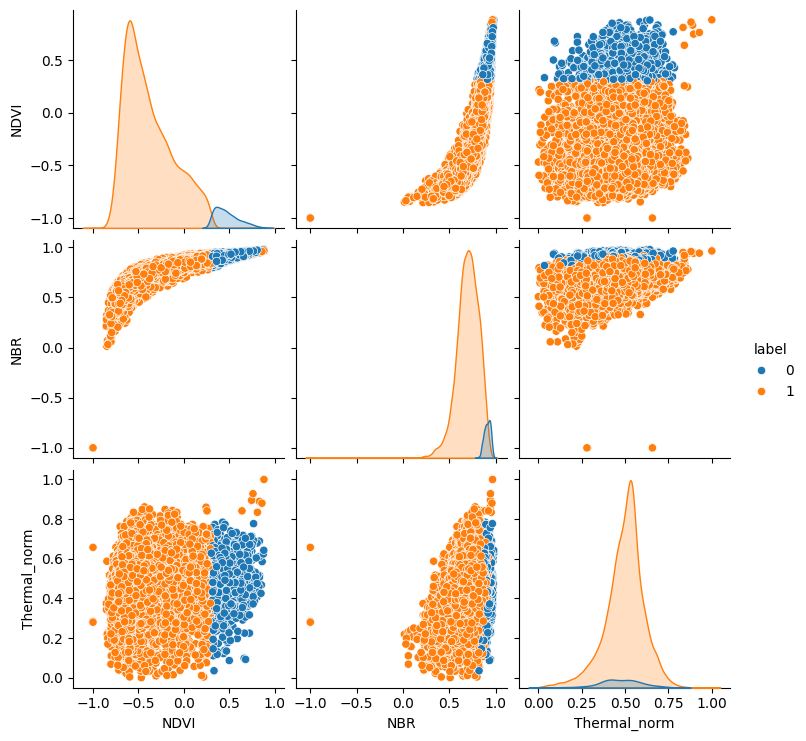

In [15]:
#Analisis EDA
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df[['NDVI', 'NBR', 'Thermal_norm', 'label']], hue='label')
plt.show()